# DESAFIO ESTÁGIO DATA ENGINEERING
### Load Data TSVs

In [904]:
#Import the dataset into a pandas dataframe using the read_table method.
import pandas as pd

# usei utf8 para corrigir a leitura dos acentos
# tsv é separado por tab
deals = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/deals.tsv', sep='\t',
                 encoding='utf-8')
sectors = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/sectors.tsv', sep='\t',
                 encoding='utf-8')
companies = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/companies.tsv', sep='\t',
                 encoding='utf-8')
contacts = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/contacts.tsv', sep='\t',
                 encoding='utf-8')

### Análise e limpeza dos dados

In [905]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null object
dealsPrice          100 non-null int64
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [906]:
sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
sectorKey    6 non-null int64
sector       6 non-null object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [907]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
companiesId             74 non-null int64
companiesName           74 non-null object
companiesDateCreated    74 non-null object
createdBy               74 non-null object
companiesEmails         74 non-null object
companiesPhones         74 non-null object
employeesId             74 non-null int64
employeesName           74 non-null object
usersResponsible        74 non-null object
sectorKey               74 non-null int64
dtypes: int64(3), object(7)
memory usage: 5.9+ KB


In [908]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 contactsId              74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null object
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: int64(3), object(9)
memory usage: 7.0+ KB


### Há um espaço em branco no metadado da primeira coluna da tabela _contacts_

In [909]:
#contacts.rename(str.strip, axis='columns')
#contacts.rename(index=str, columns={" contactsId": "contactsId"})

# renomeei cada coluna para garantir que não há espaços em branco
contacts.columns = ['contactsId', 'contactsName', 'contactsDateCreated', 'contactsCreatedBy',
                    'contactsEmails', 'contactsPhones', 'contactsEmployers', 'employersId', 
                    'contactsHomeAdress', 'contactsLatLong', 'contactsRelatedToLead', 'contactsResponsible']
print(contacts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
contactsId               74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null object
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: int64(3), object(9)
memory usage: 7.0+ KB
None


### Conversão de tipos (date)

In [910]:
deals['dealsDateCreated'] = pd.to_datetime(deals['dealsDateCreated'])
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null datetime64[ns]
dealsPrice          100 non-null int64
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.0 KB


In [911]:
contacts['contactsDateCreated'] = pd.to_datetime(contacts['contactsDateCreated'])
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
contactsId               74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null datetime64[ns]
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 7.0+ KB


In [912]:
companies['companiesDateCreated'] = pd.to_datetime(companies['companiesDateCreated'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
companiesId             74 non-null int64
companiesName           74 non-null object
companiesDateCreated    74 non-null datetime64[ns]
createdBy               74 non-null object
companiesEmails         74 non-null object
companiesPhones         74 non-null object
employeesId             74 non-null int64
employeesName           74 non-null object
usersResponsible        74 non-null object
sectorKey               74 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.9+ KB


### Valores inválidos

In [913]:
# Não é possível haver dealsDateCreated, contactsDateCreated e companiesDateCreated no futuro
# Então, me basendo na data que recebi o desafio '2018-10-09' para ser o fator seletivo

# drop de linhas inválidas em deals
deals = deals[deals.dealsDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em deals: {100 - len(deals)}')

# drop de linhas inválidas em contacts
contacts = contacts[contacts.contactsDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em contacts: {74 - len(contacts)}')

# drop de linhas inválidas em companies
companies = companies[companies.companiesDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em companies: {74 - len(companies)}')

Número de linhas descartadas em deals: 45
Número de linhas descartadas em contacts: 26
Número de linhas descartadas em companies: 26


---

# Visualização dos dados

### Join entre as tabels _deals_ e _contacts_

In [960]:
# O join vai servir para mapear o nome dos contacts
# vai auxiliar na exibição do gráfico com os nomes dos contacts

colunas_necessarias_contacts = ['contactsId','contactsName', 'contactsDateCreated' ]
deals_contacts = pd.merge(deals, contacts[colunas_necessarias_contacts], left_on='contactsId', right_on='contactsId')
deals_contacts

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,contactsName,contactsDateCreated
0,10,2018-09-08,8880,11,29,Craig Boyd,2018-05-30
1,5,2017-11-20,5030,11,28,Craig Boyd,2018-05-30
2,7,2017-09-02,600,11,11,Craig Boyd,2018-05-30
3,42,2017-12-26,2560,11,11,Craig Boyd,2018-05-30
4,18,2018-04-05,3930,30,30,Cooper Sandoval,2018-03-31
5,24,2018-01-01,3480,15,19,Jonah Day,2018-02-18
6,20,2017-10-09,2380,15,19,Jonah Day,2018-02-18
7,16,2018-05-04,6330,15,19,Jonah Day,2018-02-18
8,45,2018-02-17,8890,15,19,Jonah Day,2018-02-18
9,33,2018-05-12,7130,15,19,Jonah Day,2018-02-18


In [961]:
import matplotlib.pyplot as plt
%matplotlib inline

# para visualizar de forma ampla
plt.rcParams['figure.figsize'] = (15, 8)

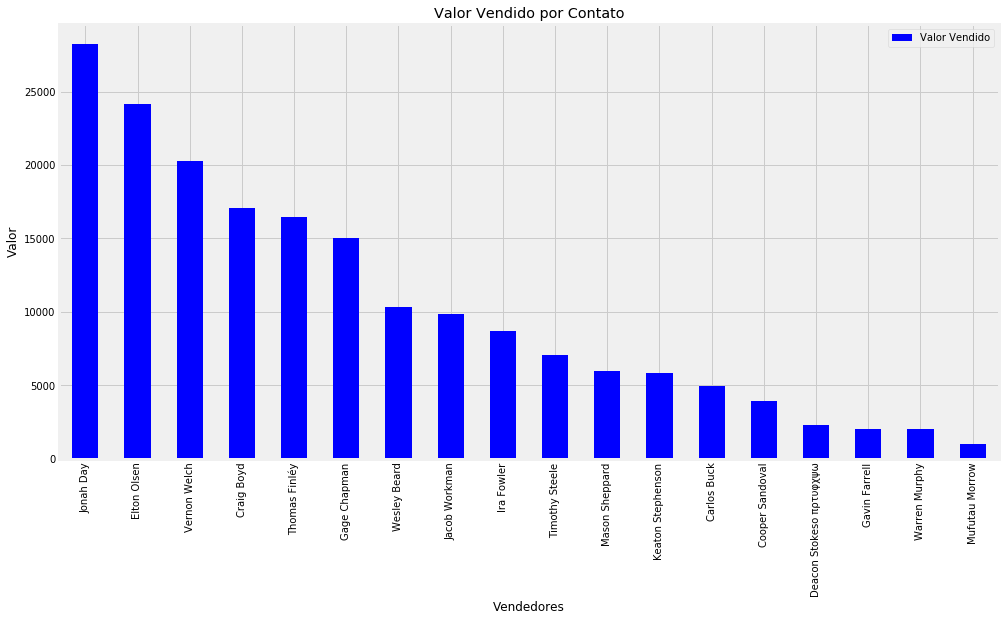

In [962]:
# organização dos dados
n_vendas_contato = deals_contacts.groupby('contactsName')['dealsPrice'].sum().sort_values(ascending=False)

# visualização do gráfico
n_vendas_contato = n_vendas_contato.plot(kind='bar', color='blue', label='Valor Vendido')

plt.xlabel('Vendedores')
plt.ylabel('Valor')
plt.title("Valor Vendido por Contato")
plt.legend(loc="upper right")
plt.legend()
plt.show()

In [963]:
# organização dos dados - valor total vendido por mês
extrai_mes = pd.DatetimeIndex(deals['dealsDateCreated']).month
n_vendas_mes = deals.groupby(extrai_mes)['dealsPrice'].sum()

# para renomear as colunas do gráfico sera necessário renomear os índices do df n_vendas_mes
n_vendas_mes = n_vendas_mes.rename(index={1:"janeiro", 2:"fevereiro", 3:"março", 4:"abril",
        5:"maio", 6:"junho", 7:"julho", 8:"agosto", 9:"setembro", 10:"outubro", 11:"novembro", 12:"dezembro"})

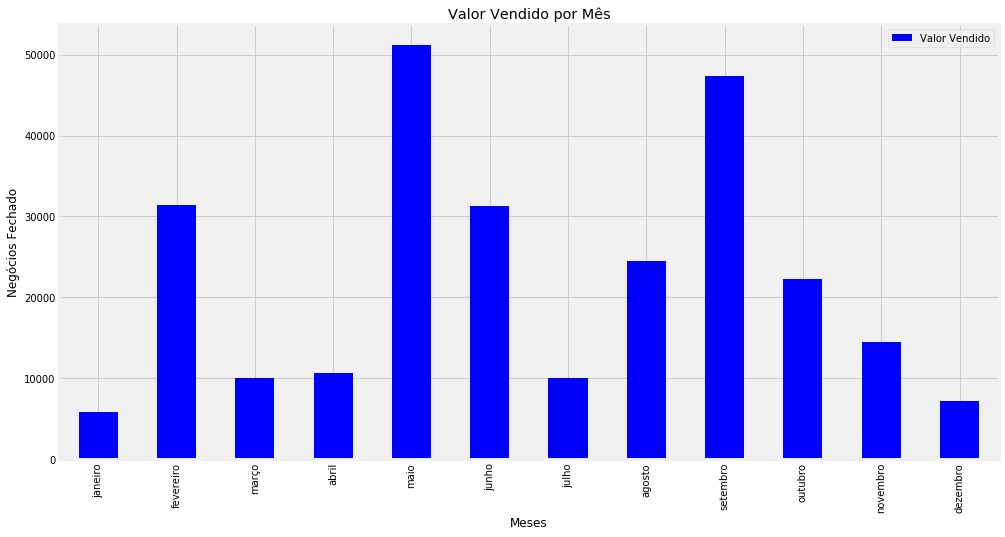

In [964]:
# visualização do gráfico
n_vendas_mes_grafico = n_vendas_mes.plot(kind='bar', color='blue', label='Valor Vendido')

plt.xlabel('Meses')
plt.ylabel('Negócios Fechado')
plt.title("Valor Vendido por Mês")
plt.legend(loc="upper right")
plt.legend()
plt.show()

---

# Lista das vendas por setores ordenado pelo mês

In [972]:
# O join vai servir para mapear o nome dos sectors
colunas_necessarias_companies = ['companiesId','companiesDateCreated', 'sectorKey' ]
companies_sectors = pd.merge(companies[colunas_necessarias_companies], sectors, left_on='sectorKey', right_on='sectorKey')

# join entre deals e companies_sectors
deals_companies_sectors = pd.merge( deals, companies_sectors, left_on='companiesId', right_on='companiesId')
deals_companies_sectors

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,companiesDateCreated,sectorKey,sector
0,10,2018-09-08,8880,11,29,2018-05-30,4,Indústria
1,18,2018-04-05,3930,30,30,2018-03-31,3,Tecnologia
2,24,2018-01-01,3480,15,19,2018-02-18,4,Indústria
3,20,2017-10-09,2380,15,19,2018-02-18,4,Indústria
4,16,2018-05-04,6330,15,19,2018-02-18,4,Indústria
5,45,2018-02-17,8890,15,19,2018-02-18,4,Indústria
6,33,2018-05-12,7130,15,19,2018-02-18,4,Indústria
7,36,2017-10-23,7660,74,74,2017-12-04,6,Atacado
8,76,2017-12-20,1980,74,74,2017-12-04,6,Atacado
9,79,2018-02-22,5400,74,74,2017-12-04,6,Atacado


In [973]:
# nesta lista vou armazenar o valor total vendido por mês, separado por setor
list_dealsPrice_sector = []


for i in sectors['sector']:
    print(i)
# query para selecionar o setor
query_sector = deals_companies[deals_companies['sector'] == "Bens de Consumo"]

# query para selecionar o mes a partir do setor
query_sector_month = query_sector[(query_sector['dealsDateCreated'].dt.month== 3)]

# group by dealsPrice
grouping_sector_month = query_sector_month.groupby('sector')['dealsPrice'].sum().sort_values(ascending=False)
list_dealsPrice_sector.append(grouping_sector_month)
print(list_dealsPrice_sector)

Bens de Consumo
Serviços
Tecnologia
Indústria
Varejo
Atacado
[Series([], Name: dealsPrice, dtype: int64)]


In [975]:
# nesta lista vou armazenar o valor total vendido por mês, separado por setor
list_dealsPrice_sector = []

for i in sectors['sector']:
    #print(i) # exibe o setor
    # query para selecionar o setor
    query_sector = deals_companies[deals_companies['sector'] == i]
    salvando_dados(i)
    
    for j in range(1,13):
        #print(j) # exibe o mes
        # query para selecionar o mes a partir do setor
        query_sector_month = query_sector[(query_sector['dealsDateCreated'].dt.month== j)]
        
        # group by dealsPrice
        grouping_sector_month = query_sector_month.groupby('sector')['dealsPrice'].sum().sort_values(ascending=False)
        list_dealsPrice_sector.append(grouping_sector_month)
#print(list_dealsPrice_sector)



#df.to_csv('example.csv')
        

In [974]:
# Grava a lista list_dealsPrice_sector no arquivo output.csv
import csv

def salvando_dados (lista):
    with open("/home/brunocampos01/projetos/challenges/indicium/output.csv", "w",  newline='') as myfile:
        for entries in list_dealsPrice_sector:
            wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
            wr.writerow(list_dealsPrice_sector)

In [923]:
# SELECT FROM WHERE 
# deals_companies.query('companiesName == "Class LLP"  & sector == "Varejo"')
# deals_companies[deals_companies['companiesName'] == "Class LLP"]

#i = "Class LLP"
#deals_companies[deals_companies['companiesName'] == i]


#for i in deals_companies['companiesName']:
#    print (i)
#deals_companies.query('companiesName == "Class LLP"  & sector == "Varejo"')


#deals_companies = deals_companies.set_index(['companiesName'])
#print(deals_companies.loc['Class LLP'])

# Lista dos setores de empresa, ordenado por quanto esse setor representa no total vendido pela empresa no mês
lista_setores = []

# query para obter todas as tuplas de um setor
query_sector = deals_companies[deals_companies['companiesName'].notnull() & (deals_companies['sector'].notnull())]

#query_sector = deals_companies[deals_companies['sector'] == "Serviços" ]

#query_sector = deals_companies[deals_companies['sector'] == "Tecnologia" ]

#query_sector = deals_companies[deals_companies['sector'] == "Indústria" ]

#query_sector = deals_companies[deals_companies['sector'] == "Varejo" ]

#query_sector = deals_companies[deals_companies['sector'] == "Atacado" ]

query_sector_group = deals_companies.groupby(extrai_mes)['dealsPrice'].sum().sort_values(ascending=False)
#query_sector_group
query_sector

# agrupamento por mes
#group_month = deals_companies.groupby(extrai_mes)['dealsPrice'].sum().sort_values(ascending=False)









# obtem todos os tuplas de uma companie na tabela deals_companies
#get_companie = deals_companies[deals_companies['companiesName'] == "Class LLP"]

# agrupa os valores vendidos por sector
#group_sector = get_companie.groupby('sector')['dealsPrice'].sum().sort_values(ascending=False)
#group_sector


,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesName,companiesDateCreated,createdBy,companiesEmails,companiesPhones,employeesId,employeesName,usersResponsible,sector
companiesId,,,,,,,,,,,,,
3,83,2018-06-26,9590,3,Sed Dui Fusce Consulting,2017-06-29,johndoe,lacus.Aliquam@Proindolor.ca,(22) 6539-2114,3.0,Thomas Finléy,elisadoe,Atacado
3,34,2018-05-13,6840,3,Sed Dui Fusce Consulting,2017-06-29,johndoe,lacus.Aliquam@Proindolor.ca,(22) 6539-2114,3.0,Thomas Finléy,elisadoe,Atacado
11,7,2017-09-02,600,11,Laoreet Lectus Quis Foundation,2018-05-30,johndoe,orci.consectetuer@noncursus.ca,(94) 6629-0692,11.0,Craig Boyd,elisadoe,Tecnologia
11,42,2017-12-26,2560,11,Laoreet Lectus Quis Foundation,2018-05-30,johndoe,orci.consectetuer@noncursus.ca,(94) 6629-0692,11.0,Craig Boyd,elisadoe,Tecnologia
13,55,2018-08-11,8880,13,Orci Consectetuer Foundation,2018-04-19,johndoe,sed@velit.co.uk,(72) 5635-8839,13.0,Wesley Beard,maryann,Serviços
13,11,2018-09-08,1450,13,Orci Consectetuer Foundation,2018-04-19,johndoe,sed@velit.co.uk,(72) 5635-8839,13.0,Wesley Beard,maryann,Serviços
16,50,2018-03-26,990,16,Cras Institute,2017-12-23,johndoe,Fusce.feugiat.Lorem@nonummyultricies.co.uk,(41) 7717-5906,16.0,Mufutau Morrow,joerobertson,Varejo
18,90,2018-02-27,4380,18,Non Ante Bibendum Associates,2017-09-02,johndoe,feugiat@ornarelectus.org,(95) 6644-4079,18.0,Keaton Stephenson,carlossuarez,Varejo
19,24,2018-01-01,3480,15,Senectus Limited,2018-02-18,johndoe,velit.eget.laoreet@nulla.net,(22) 6993-0124,19.0,Jonah Day,elisadoe,Indústria


In [924]:
# Total vendido por cada empresa
n_vendas_companies = deals_companies.groupby('companiesName')['dealsPrice'].sum().sort_values(ascending=False)


n_vendas_companies

companiesName
Senectus Limited                  28210
Commodo Tincidunt Nibh Limited    24160
Dolor LLP                         20240
Laoreet Lectus Quis Foundation    17070
Sed Dui Fusce Consulting          16430
Auctor Foundation                 15040
Orci Consectetuer Foundation      10330
Ante Maecenas Mi Limited           9870
Et Foundation                      8680
Ut Company                         7030
Eros Corp.                         5930
Non Ante Bibendum Associates       5850
Hendrerit Consectetuer Ltd         4960
Luctus Limited                     3930
Auctor Corp.                       2280
In Sodales Elit Incorporated       2040
Nunc Consulting                    2000
Cras Institute                      990
Name: dealsPrice, dtype: int64